# 📊 Jakarta Traffic Graphs

This notebook contains visualizations based on the traffic dataset for Jakarta.
Each graph highlights key patterns in traffic volume, speed, and influencing factors.


In [5]:
import pandas as pd

df = pd.read_csv('../data/jakarta_traffic_data.csv')

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Vehicle_Count'] = df['Vehicle_Count'].fillna(df['Vehicle_Count'].mean())
df['Average_Speed_kmh'] = df['Average_Speed_kmh'].fillna(df['Average_Speed_kmh'].mean())


In [7]:
print(df['Weather_Condition'].mode())
print(df['Weather_Condition'].unique())
print(df['Weather_Condition'].isna().sum())


0    Sunny
Name: Weather_Condition, dtype: object
['Sunny' 'Rainy' 'Cloudy' nan]
1


In [9]:
!pip install matplotlib

   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   - -------------------------------------- 0.3/8.1 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/8.1 MB 2.6 MB/s eta 0:00:03
   ------- -------------------------------- 1.6/8.1 MB 2.8 MB/s eta 0:00:03
   ----------- ---------------------------- 2.4/8.1 MB 3.1 MB/s eta 0:00:02
   ---------------- ----------------------- 3.4/8.1 MB 3.4 MB/s eta 0:00:02
   ---------------------- ----------------- 4.5/8.1 MB 3.6 MB/s eta 0:00:02
   --------------------------- ------------ 5.5/8.1 MB 3.8 MB/s eta 0:00:01
   --------------------------------- ------ 6.8/8.1 MB 4.1 MB/s eta 0:00:01
   -------------------------------------- - 7.9/8.1 MB 4.2 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 4.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ----------------------- ---------------- 1.3/2.2 MB 7.2 MB/s eta 0:00:01
   ------------------------------

In [10]:
import matplotlib.pyplot as plt


## ✅ Visualization Objective:
* Show the hours with the highest overall vehicle volume.

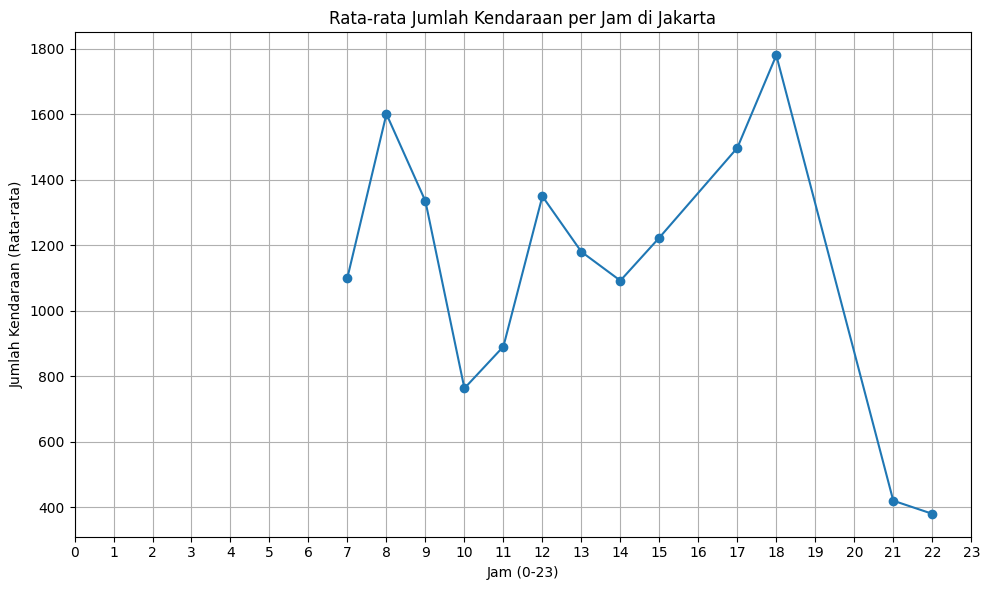

In [11]:
import matplotlib.pyplot as plt

# Hitung total kendaraan per jam (gabungan semua lokasi & tanggal)
hourly_traffic = df.groupby('Hour')['Vehicle_Count'].mean()

# Plot
plt.figure(figsize=(10, 6))
plt.plot(hourly_traffic.index, hourly_traffic.values, marker='o')
plt.title('Rata-rata Jumlah Kendaraan per Jam di Jakarta')
plt.xlabel('Jam (0-23)')
plt.ylabel('Jumlah Kendaraan (Rata-rata)')
plt.grid(True)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\2764257263.py:16: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
c:\Users\HP ProBook\anaconda3\envs\python_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


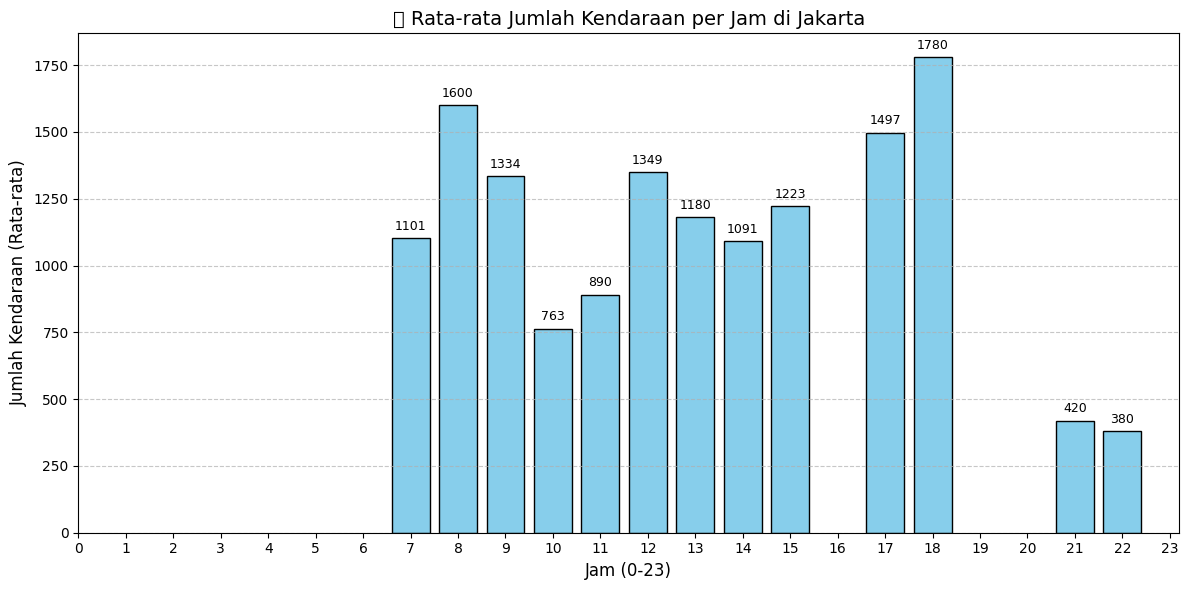

In [12]:
import matplotlib.pyplot as plt

# Hitung rata-rata jumlah kendaraan per jam
hourly_traffic = df.groupby('Hour')['Vehicle_Count'].mean()

# Plot bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(hourly_traffic.index, hourly_traffic.values, color='skyblue', edgecolor='black')

# Styling
plt.title('🚗 Rata-rata Jumlah Kendaraan per Jam di Jakarta', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Jumlah Kendaraan (Rata-rata)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(range(0, 24))
plt.tight_layout()

# Tampilkan angka di atas bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.show()


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\3231014891.py:15: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


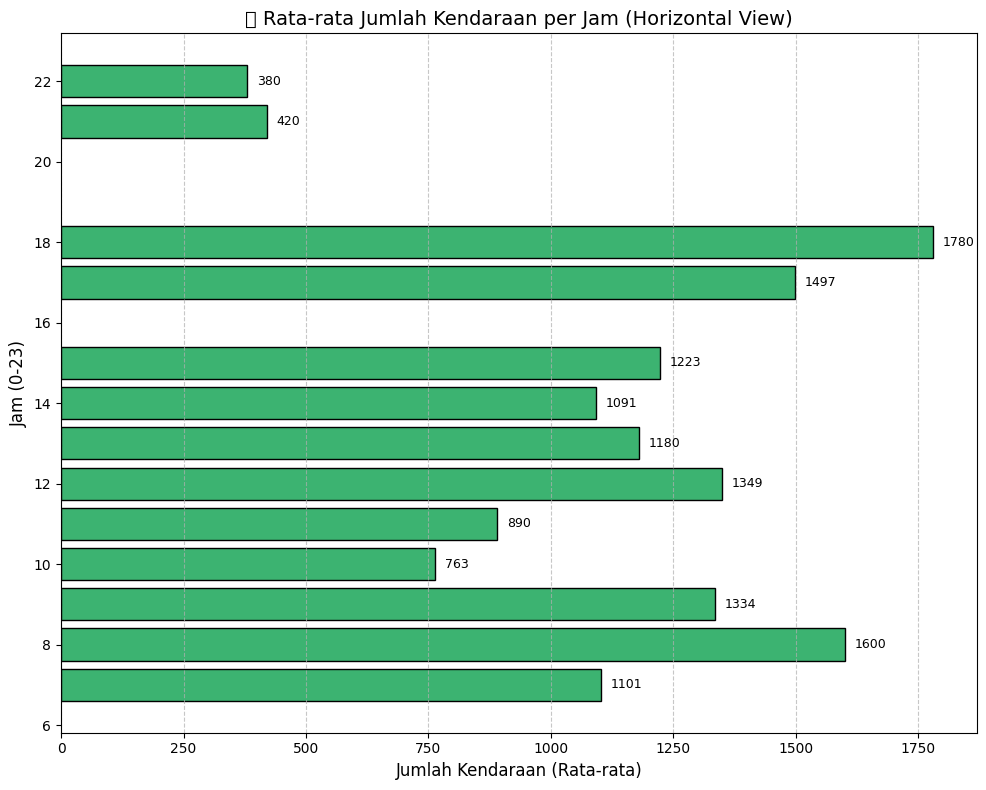

In [13]:
plt.figure(figsize=(10, 8))
bars = plt.barh(hourly_traffic.index, hourly_traffic.values, color='mediumseagreen', edgecolor='black')

plt.title('🚗 Rata-rata Jumlah Kendaraan per Jam (Horizontal View)', fontsize=14)
plt.xlabel('Jumlah Kendaraan (Rata-rata)', fontsize=12)
plt.ylabel('Jam (0-23)', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Tampilkan nilai
for bar in bars:
    width = bar.get_width()
    plt.text(width + 20, bar.get_y() + bar.get_height()/2, f'{int(width)}',
             va='center', fontsize=9)

plt.tight_layout()
plt.show()


In [15]:
!pip install seaborn


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\1449181491.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette='Blues_d')
C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\1449181491.py:12: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP ProBook\anaconda3\envs\python_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128663 (\N{AUTOMOBILE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


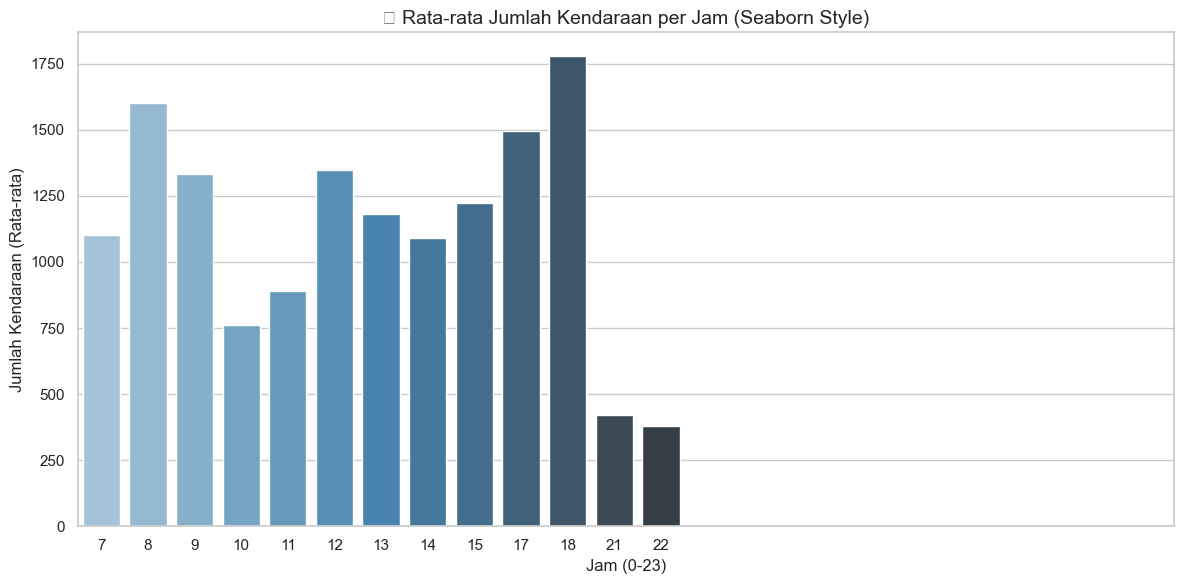

In [16]:
import seaborn as sns

sns.set(style='whitegrid')  # Atur tampilan seaborn

plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_traffic.index, y=hourly_traffic.values, palette='Blues_d')

plt.title('🚗 Rata-rata Jumlah Kendaraan per Jam (Seaborn Style)', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Jumlah Kendaraan (Rata-rata)', fontsize=12)
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\1260987280.py:11: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\1260987280.py:11: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP ProBook\anaconda3\envs\python_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127782 (\N{WHITE SUN BEHIND CLOUD WITH RAIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\HP ProBook\anaconda3\envs\python_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


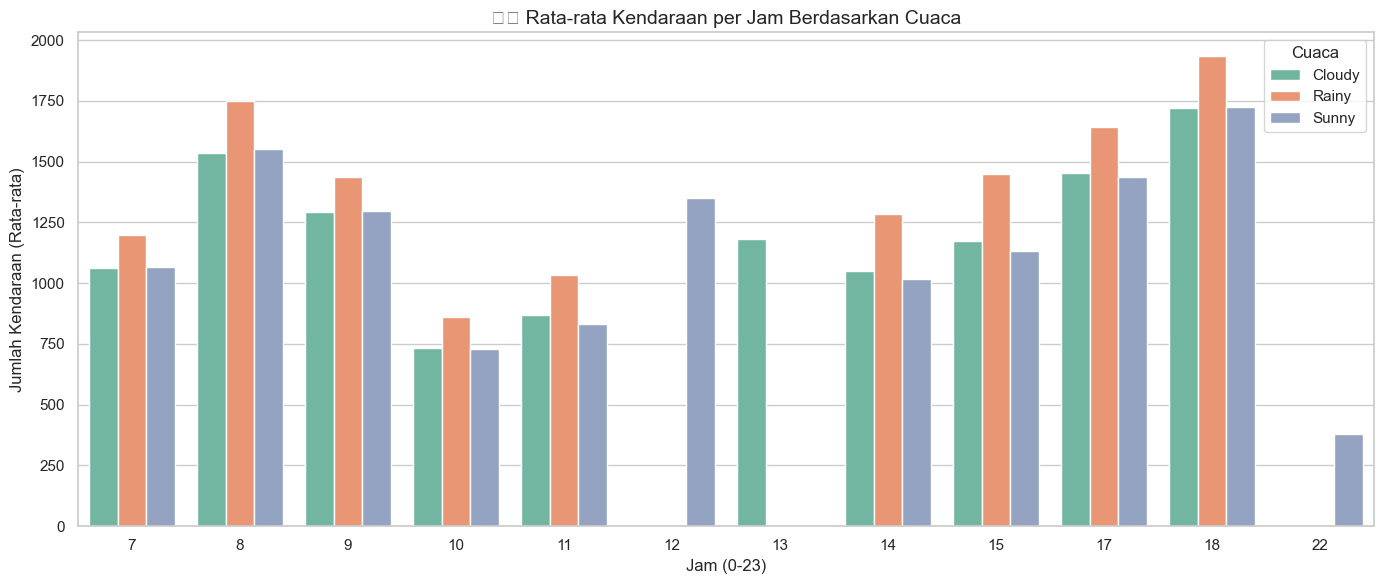

In [17]:
# Hitung rata-rata jumlah kendaraan per jam dan cuaca
grouped = df.groupby(['Hour', 'Weather_Condition'])['Vehicle_Count'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='Hour', y='Vehicle_Count', hue='Weather_Condition', palette='Set2')

plt.title('🌦️ Rata-rata Kendaraan per Jam Berdasarkan Cuaca', fontsize=14)
plt.xlabel('Jam (0-23)', fontsize=12)
plt.ylabel('Jumlah Kendaraan (Rata-rata)', fontsize=12)
plt.legend(title='Cuaca')
plt.tight_layout()
plt.show()


In [18]:
df['Date'] = pd.to_datetime(df['Date'])  # kalau belum datetime
df['Day_of_Week'] = df['Date'].dt.day_name()


C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\1011251120.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_speed_day.index, y=avg_speed_day.values, palette='coolwarm')
C:\Users\HP ProBook\AppData\Local\Temp\ipykernel_22316\1011251120.py:19: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
c:\Users\HP ProBook\anaconda3\envs\python_env\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


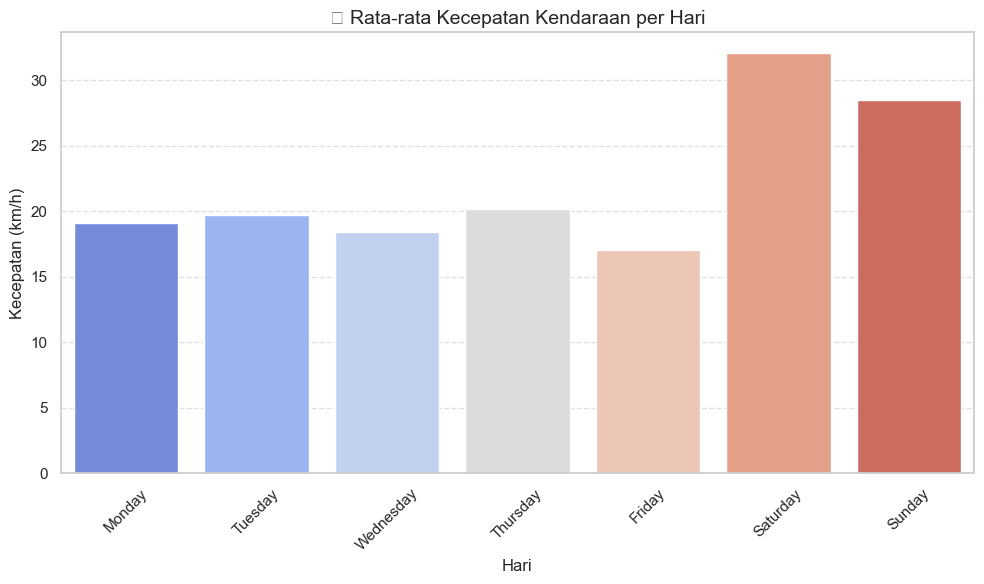

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Urutan hari biar rapi
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Hitung kecepatan rata-rata per hari
avg_speed_day = df.groupby('Day_of_Week')['Average_Speed_kmh'].mean().reindex(day_order)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=avg_speed_day.index, y=avg_speed_day.values, palette='coolwarm')

plt.title('📅 Rata-rata Kecepatan Kendaraan per Hari', fontsize=14)
plt.xlabel('Hari')
plt.ylabel('Kecepatan (km/h)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
